# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

# 1. Data Loading and Overview

## 1.1 Data Loading 

In [2]:
# File paths for the dataset files
files = ['data/cms_hospital_patient_satisfaction_2020.csv',
    'data/cms_hospital_patient_satisfaction_2019.csv',
    'data/cms_hospital_patient_satisfaction_2018.csv',
    'data/cms_hospital_patient_satisfaction_2017.csv',
    'data/cms_hospital_patient_satisfaction_2016.csv']

## 1.2 Merging Data

In [3]:
# Create an empty list to store the dataframes
dataframes = []

# Load each file into a dataframe and append it to the list
for files in files:
    hospital_df = pd.read_csv(files)
    dataframes.append(hospital_df)

# Concatenate all dataframes into one complete dataset
hospital_df = pd.concat(dataframes, ignore_index=True)

## 1.3 First Look of Data

In [5]:
display(hospital_df.head(3))

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,NaN,77,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",Not Applicable,NaN,7,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,NaN,16,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN


# 2. Summary and Understanding of Data

## 2.1 Exploratory Data Analysis

In [8]:
# Function to perform all EDA
def eda(hospital_df, name=""):
    # Displaying basic details
    print(f"EDA of {name} Dataset is........")
    print(f"Size: {hospital_df.size}")
    print(f"Columns: {hospital_df.shape[1]}")
    print(f"Records: {hospital_df.shape[0]}")
    print("*"*50, "\n")
    
    # Displayng Top 4 records of Data
    print("First Look of Data: ")
    display(hospital_df.head())
    print("*"*50, "\n")
    
    # Getting Numerical columns and Categorical columns
    cat_col = hospital_df.select_dtypes(object).columns
    num_col = hospital_df.select_dtypes(np.number).columns
    
    # Displaying the Numerical Columns
    print("Dataset has following Numerical Columns: ")
    if len(num_col) == 0:
        print('''\t"No Numerical Column exist."''', "\n")
    else:
        for i, j in enumerate(num_col):
            print(f"{i+1}- {j}")
    
    # Displaying the Categorical Columns
    print("*"*50)
    print("Dataset has following Categorical Columns: ")
    if len(cat_col) == 0:
        print("\tNo Categorical Column exist.")
    else:
        for i, j in enumerate(cat_col):
            print(f"{i+1}- {j}")
    print("*"*50, "\n")
    
    # Displaying info of Data e.g., Null values, data types etc
    print("Information of Data is as follows: ")
    display(hospital_df.info())
    print("*"*50, "\n")
    
    # Displaying Statistical properties
    print("Statistical Properties of Data: ")
    display(hospital_df.describe(include="all"))
    print("*"*50, "\n")

In [9]:
eda(hospital_df, "Customer Satisfaction of US Hospital")

EDA of Customer Satisfaction of US Hospital Dataset is........
Size: 71108369
Columns: 43
Records: 1653683
************************************************** 

First Look of Data: 


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,NaN,77,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",Not Applicable,NaN,7,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,NaN,16,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,NaN,Not Applicable,NaN,90,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,3,NaN,Not Applicable,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national avera

************************************************** 

Dataset has following Numerical Columns: 
1- ZIP Code
2- Year
**************************************************
Dataset has following Categorical Columns: 
1- Facility ID
2- Facility Name
3- Address
4- City
5- State
6- County Name
7- Phone Number
8- HCAHPS Measure ID
9- HCAHPS Question
10- HCAHPS Answer Description
11- Patient Survey Star Rating
12- Patient Survey Star Rating Footnote
13- HCAHPS Answer Percent
14- HCAHPS Answer Percent Footnote
15- HCAHPS Linear Mean Value
16- Number of Completed Surveys
17- Number of Completed Surveys Footnote
18- Survey Response Rate Percent
19- Survey Response Rate Percent Footnote
20- Start Date
21- End Date
22- Hospital Type
23- Hospital Ownership
24- Emergency Services
25- Meets criteria for promoting interoperability of EHRs
26- Hospital overall rating
27- Hospital overall rating footnote
28- Mortality national comparison
29- Mortality national comparison footnote
30- Safety of care national 

None

************************************************** 

Statistical Properties of Data: 


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
count,1653683.0,1653683,1653683,1653683,1653683,1.653683e+06,1651283,1653683,1653683,1653683,1653683,1653683,76826,1653683,346726,1653683,1653683,506289,1653683,506289,1653683,1653683,1.653683e+06,1653683,1653683,1653683,1440651,1653683,441842.0,1653683,475951.0,1653683,744337,1653683,336592.0,1653683,470302.0,1653683,410079.0,1653683,373723,1653683,634119
unique,8424.0,5769,5190,3007,56,NaN,1627,9924,98,100,101,7,7,103,36,49,3035,36,79,36,5,5,NaN,4,11,2,2,6,16.0,7,12.0,7,12,7,12.0,7,10.0,7,10.0,7,10,7,12
top,141350.0,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,TX,NaN,LOS ANGELES,(216) 844-1000,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,15 - The number of cases/patients is too few t...,Not Applicable,1,Not Applicable,Not Available,6 - Fewer than 100 patients completed the HCAH...,Not Available,6 - Fewer than 100 patients completed the HCAH...,07/01/2018,06/30/2019,NaN,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,16.0,Same as the national average,5.0,Not Available,Results are not available for this reporting p...,Above the national average,5.0,Not Available,16.0,Same as the national average,5.0,Same as the national average,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...
freq,346.0,5004,2422,10034,139785,NaN,27962,372,23928,23928,23928,1380856,28385,521726,39914,1404784,234442,57345,234442,57345,442587,442587,NaN,1149842,724291,1534987,1440486,472382,172515.0,773391,135222.0,743722,217470,395717,116994.0,470302,218271.0,930543,158472.0,430889,118415,633690,202620
mean,NaN,NaN,NaN,NaN,NaN,5.403704e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018323e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.693196e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.425935e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,6.030000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.016000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.301300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.017000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.541500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.609200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

************************************************** 



# 3. Data Preprocessing

## 3.1 Handling Missing Values

In [10]:
hospital_df.isna().sum()

Facility ID                                                            0
Facility Name                                                          0
Address                                                                0
City                                                                   0
State                                                                  0
ZIP Code                                                               0
County Name                                                         2400
Phone Number                                                           0
HCAHPS Measure ID                                                      0
HCAHPS Question                                                        0
HCAHPS Answer Description                                              0
Patient Survey Star Rating                                             0
Patient Survey Star Rating Footnote                              1576857
HCAHPS Answer Percent                              

In [11]:
# Dropping the Columns with 80% Missing Values
hospital_df = hospital_df.drop(columns=['Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent Footnote', 'Number of Completed Surveys Footnote', 'Survey Response Rate Percent Footnote', 'Meets criteria for promoting interoperability of EHRs', 'Hospital overall rating footnote', 'Mortality national comparison footnote', 'Safety of care national comparison footnote', 'Readmission national comparison footnote', 'Patient experience national comparison footnote', 'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison footnote'])

In [12]:
hospital_df.isna().sum()

Facility ID                                                0
Facility Name                                              0
Address                                                    0
City                                                       0
State                                                      0
ZIP Code                                                   0
County Name                                             2400
Phone Number                                               0
HCAHPS Measure ID                                          0
HCAHPS Question                                            0
HCAHPS Answer Description                                  0
Patient Survey Star Rating                                 0
HCAHPS Answer Percent                                      0
HCAHPS Linear Mean Value                                   0
Number of Completed Surveys                                0
Survey Response Rate Percent                               0
Start Date              

Handling missing values in the Column "County Name"

In [13]:
hospital_df[['City', 'State', 'County Name']].isna().sum()

City              0
State             0
County Name    2400
dtype: int64

Imputing missing values in the Column "County Name" with respect to 'City' & 'State'

In [14]:
# Create a dictionary to map City-State combinations to County Name
city_state_to_county = hospital_df.dropna(subset=['County Name']).drop_duplicates(subset=['City', 'State']).set_index(['City', 'State'])['County Name'].to_dict()

# Function to impute missing County Names
def impute_county(row):
    if pd.isnull(row['County Name']):
        city_state_key = (row['City'], row['State'])
        return city_state_to_county.get(city_state_key)
    return row['County Name']

# Apply the function to impute missing County Names
hospital_df['County Name'] = hospital_df.apply(impute_county, axis=1)

In [15]:
# Remove the remaining missing values in the County Name column
hospital_df = hospital_df.dropna(subset = ['County Name'])

## 3.2 Analyzing the Categorical Columns for "Not Available" / "Not Applicable" values

In [16]:
hospital_df.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'HCAHPS Answer Percent', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Survey Response Rate Percent',
       'Start Date', 'End Date', 'Year', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'],
      dtype='object')

In [17]:
hospital_df['Patient experience national comparison'].value_counts()

Patient experience national comparison
Not Available                   470192
Above the national average      344048
Same as the national average    332277
Below the national average      317086
Above the National average       66935
Same as the National average     63415
Below the National average       59620
Name: count, dtype: int64

Columns having Not Availabe / Not Applicable values:

- 'Patient Survey Star Rating'
- 'HCAHPS Answer Percent'
- 'HCAHPS Linear Mean Value'
- 'Number of Completed Surveys'
- 'Survey Response Rate Percent'
- 'Hospital overall rating'
- 'Mortality national comparison'
- 'Safety of care national comparison'
- 'Readmission national comparison'
- 'Patient experience national comparison'
- 'Effectiveness of care national comparison'
- 'Timeliness of care national comparison'
- 'Efficient use of medical imaging national comparison'

Column 'Patient Survey Star Rating': 88.15%
Column 'HCAHPS Answer Percent': 42.77%
Column 'HCAHPS Linear Mean Value': 89.19%
Column 'Number of Completed Surveys': 14.17%
Column 'Survey Response Rate Percent': 14.17%
Column 'Hospital overall rating': 24.22%
Column 'Mortality national comparison': 28.74%
Column 'Safety of care national comparison': 44.97%
Column 'Readmission national comparison': 20.32%
Column 'Patient experience national comparison': 28.43%
Column 'Effectiveness of care national comparison': 24.80%
Column 'Timeliness of care national comparison': 22.59%
Column 'Efficient use of medical imaging national comparison': 38.32%


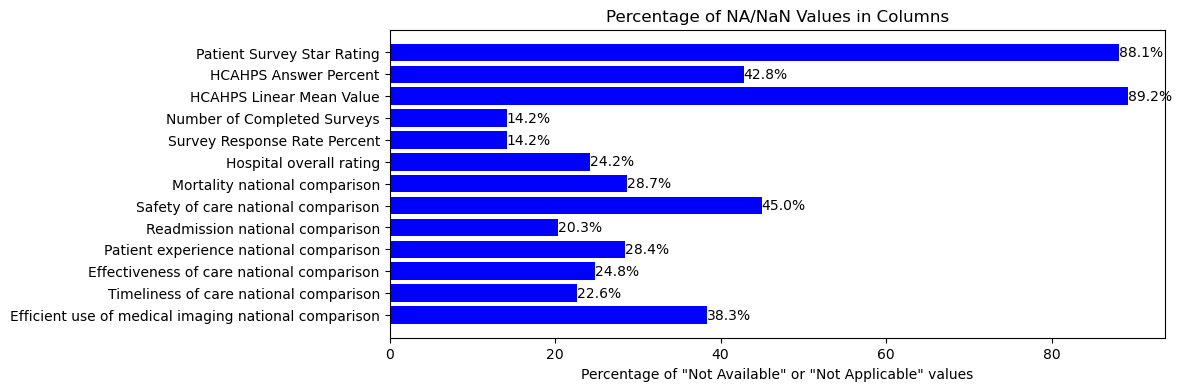

In [18]:
# List of columns with 'Not Available' / 'Not Applicable' values
columns_with_na = [
    'Patient Survey Star Rating',
    'HCAHPS Answer Percent',
    'HCAHPS Linear Mean Value',
    'Number of Completed Surveys',
    'Survey Response Rate Percent',
    'Hospital overall rating',
    'Mortality national comparison',
    'Safety of care national comparison',
    'Readmission national comparison',
    'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]

# Calculate percentage of 'Not Available' or 'Not Applicable' values in each column
na_percentages = {}
for column in columns_with_na:
    na_count = hospital_df[hospital_df[column].isin(['Not Available', 'Not Applicable'])][column].count()
    total_count = len(hospital_df[column])
    percentage = (na_count / total_count) * 100
    na_percentages[column] = percentage

# Display percentage of 'Not Available' or 'Not Applicable' values in each column
for column, percentage in na_percentages.items():
    print(f"Column '{column}': {percentage:.2f}%")
    
# Create a bar chart to visualize the percentages
plt.figure(figsize=(10, 4))
bars = plt.barh(list(na_percentages.keys()), list(na_percentages.values()), color='blue')
plt.xlabel('Percentage of "Not Available" or "Not Applicable" values')
plt.title('Percentage of NA/NaN Values in Columns')
plt.gca().invert_yaxis()  # Invert y-axis to display the columns from top to bottom
# Annotate bars with their respective values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}%', 
             va='center', ha='left', color='black')
plt.show()

As Patient experience national comparison is our target variable. We are dropping the values with "Not Available" from our target variable.

Also, as 'Patient Survey Star Rating', and HCAHPS Linear Mean Value has more than 60% Not Available values, we will be dropping the columns.

In [19]:
hospital_df = hospital_df[hospital_df['Patient experience national comparison'] != 'Not Available']

Column 'HCAHPS Answer Percent': 31.75%
Column 'Number of Completed Surveys': 0.21%
Column 'Survey Response Rate Percent': 0.21%
Column 'Hospital overall rating': 4.12%
Column 'Mortality national comparison': 9.75%
Column 'Safety of care national comparison': 23.50%
Column 'Readmission national comparison': 5.20%
Column 'Patient experience national comparison': 0.00%
Column 'Effectiveness of care national comparison': 7.32%
Column 'Timeliness of care national comparison': 8.66%
Column 'Efficient use of medical imaging national comparison': 19.50%


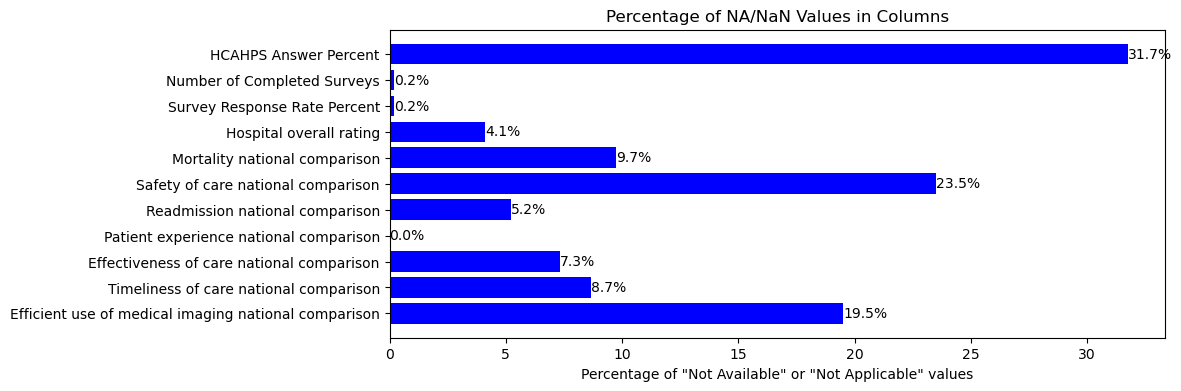

In [20]:
# List of columns with 'Not Available' / 'Not Applicable' values
columns_with_na = [
    'HCAHPS Answer Percent',
    'Number of Completed Surveys',
    'Survey Response Rate Percent',
    'Hospital overall rating',
    'Mortality national comparison',
    'Safety of care national comparison',
    'Readmission national comparison',
    'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]

# Calculate percentage of 'Not Available' or 'Not Applicable' values in each column
na_percentages = {}
for column in columns_with_na:
    na_count = hospital_df[hospital_df[column].isin(['Not Available', 'Not Applicable'])][column].count()
    total_count = len(hospital_df[column])
    percentage = (na_count / total_count) * 100
    na_percentages[column] = percentage

# Display percentage of 'Not Available' or 'Not Applicable' values in each column
for column, percentage in na_percentages.items():
    print(f"Column '{column}': {percentage:.2f}%")
    
# Create a bar chart to visualize the percentages
plt.figure(figsize=(10, 4))
bars = plt.barh(list(na_percentages.keys()), list(na_percentages.values()), color='blue')
plt.xlabel('Percentage of "Not Available" or "Not Applicable" values')
plt.title('Percentage of NA/NaN Values in Columns')
plt.gca().invert_yaxis()  # Invert y-axis to display the columns from top to bottom
# Annotate bars with their respective values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}%', 
             va='center', ha='left', color='black')
plt.show()

Dropping the rows having less than 10% values "Not Available"

In [21]:
columns_to_drop_na = [
    'HCAHPS Answer Percent',
    'Number of Completed Surveys',
    'Survey Response Rate Percent',
    'Hospital overall rating',
    'Mortality national comparison',
    'Safety of care national comparison',
    'Readmission national comparison',
    'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]

threshold = 10

for column in columns_to_drop_na:
    na_percentage = (hospital_df[column].value_counts(normalize=True).get('Not Available', 0) * 100)
    if na_percentage < threshold:
        hospital_df = hospital_df[hospital_df[column] != 'Not Available']

Imputing the value "Not Available" with Mode of columns "HCAHPS Answer Percent", "Safety of care national comparison" and "Efficient use of medical imaging national comparison"

Column 'HCAHPS Answer Percent': 0.00%
Column 'Number of Completed Surveys': 0.00%
Column 'Survey Response Rate Percent': 0.00%
Column 'Hospital overall rating': 0.00%
Column 'Mortality national comparison': 0.00%
Column 'Safety of care national comparison': 0.00%
Column 'Readmission national comparison': 0.00%
Column 'Patient experience national comparison': 0.00%
Column 'Effectiveness of care national comparison': 0.00%
Column 'Timeliness of care national comparison': 0.00%
Column 'Efficient use of medical imaging national comparison': 0.00%


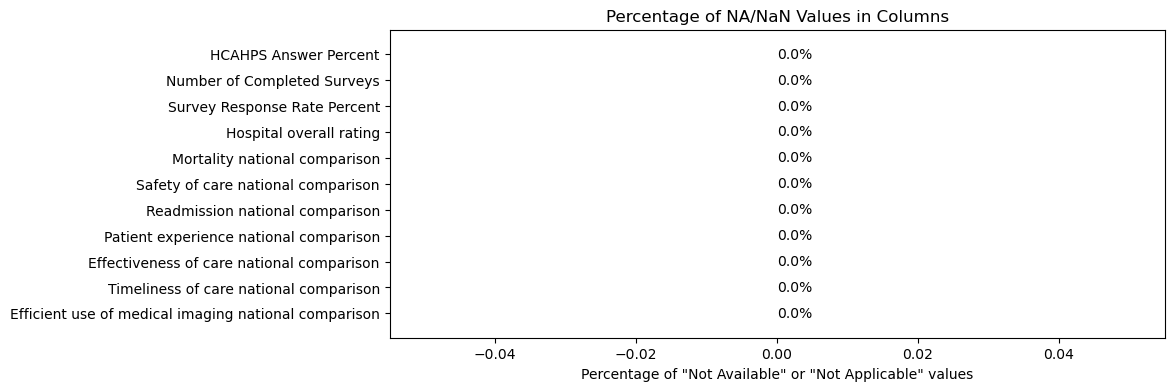

In [25]:
# List of columns with 'Not Available' / 'Not Applicable' values
columns_with_na = [
    'HCAHPS Answer Percent',
    'Number of Completed Surveys',
    'Survey Response Rate Percent',
    'Hospital overall rating',
    'Mortality national comparison',
    'Safety of care national comparison',
    'Readmission national comparison',
    'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]

# Calculate percentage of 'Not Available' or 'Not Applicable' values in each column
na_percentages = {}
for column in columns_with_na:
    na_count = hospital_df[hospital_df[column].isin(['Not Available', 'Not Applicable'])][column].count()
    total_count = len(hospital_df[column])
    percentage = (na_count / total_count) * 100
    na_percentages[column] = percentage

# Display percentage of 'Not Available' or 'Not Applicable' values in each column
for column, percentage in na_percentages.items():
    print(f"Column '{column}': {percentage:.2f}%")
    
# Create a bar chart to visualize the percentages
plt.figure(figsize=(10, 4))
bars = plt.barh(list(na_percentages.keys()), list(na_percentages.values()), color='blue')
plt.xlabel('Percentage of "Not Available" or "Not Applicable" values')
plt.title('Percentage of NA/NaN Values in Columns')
plt.gca().invert_yaxis()  # Invert y-axis to display the columns from top to bottom
# Annotate bars with their respective values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}%', 
             va='center', ha='left', color='black')
plt.show()

In [23]:
hospital_df['Safety of care national comparison'].value_counts()

Safety of care national comparison
Above the national average      310117
Below the national average      239783
Same as the national average    174482
Not Available                   141645
Same as the National average     60610
Above the National average       42075
Below the National average       36080
Name: count, dtype: int64

In [24]:
# Impute values in "HCAHPS Answer Percent Categories", "Safety of care national comparison" and 
# "Efficient use of medical imaging national comparison"

# Standardizing string formats
hospital_df['HCAHPS Answer Percent'] = hospital_df['HCAHPS Answer Percent'].astype(str).str.strip().str.lower()

# Choosing the imputation value
mode_value = hospital_df['HCAHPS Answer Percent'][~hospital_df['HCAHPS Answer Percent'].isin(['not applicable', 'not available'])].mode()[0]

# Imputing 'Not Available' and 'Not Applicable'
hospital_df['HCAHPS Answer Percent'] = hospital_df['HCAHPS Answer Percent'].replace(['not applicable', 'not available'], mode_value)

# Standardizing string formats
hospital_df['Safety of care national comparison'] = hospital_df['Safety of care national comparison'].astype(str).str.strip().str.lower()

# Choosing the imputation value
mode_value2 = hospital_df['Safety of care national comparison'][~hospital_df['Safety of care national comparison'].isin(['not applicable', 'not available'])].mode()[0]

# Imputing 'Not Available' and 'Not Applicable'
hospital_df['Safety of care national comparison'].replace(['not applicable', 'not available'], mode_value2, inplace=True)

# Standardizing string formats
hospital_df['Efficient use of medical imaging national comparison'] = hospital_df['Efficient use of medical imaging national comparison'].astype(str).str.strip().str.lower()

# Choosing the imputation value
mode_value3 = hospital_df['Efficient use of medical imaging national comparison'][~hospital_df['Efficient use of medical imaging national comparison'].isin(['not applicable', 'not available'])].mode()[0]

# Imputing 'Not Available' and 'Not Applicable'
hospital_df['Efficient use of medical imaging national comparison'].replace(['not applicable', 'not available'], mode_value3, inplace=True)

# 4. Data Analysis

## 4.1 Facility Information

### Question 1: What are the most common facility names, cities, or states?

In [26]:
# Convert Facility Name, City, and State columns to string to avoid issues
hospital_df['Facility Name'] = hospital_df['Facility Name'].astype(str)
hospital_df['City'] = hospital_df['City'].astype(str)
hospital_df['State'] = hospital_df['State'].astype(str)

# Finding the most common facility names
top_facility_names = hospital_df['Facility Name'].value_counts().head(10)

# Finding the most common cities
top_cities = hospital_df['City'].value_counts().head(10)

# Finding the most common states
top_states = hospital_df['State'].value_counts().head(10)

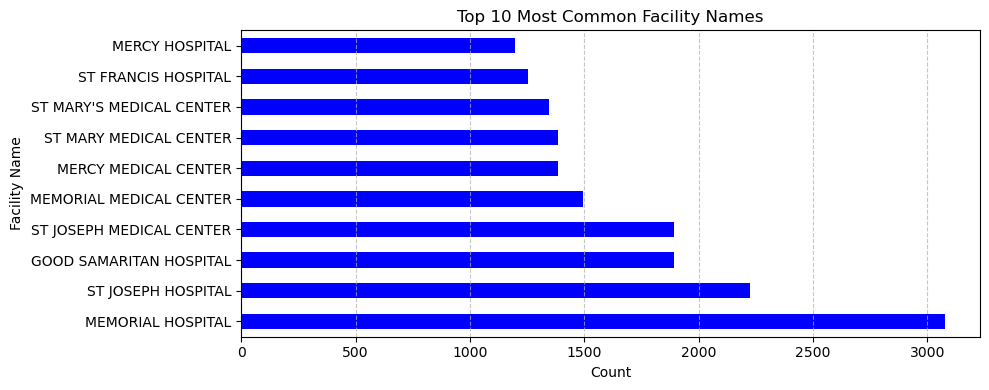

In [27]:
# Visualization - Top Facility Names
plt.figure(figsize=(10, 4))
top_facility_names.plot(kind='barh', color='blue')  # Set color for the bars
plt.title('Top 10 Most Common Facility Names')
plt.xlabel('Count')
plt.ylabel('Facility Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

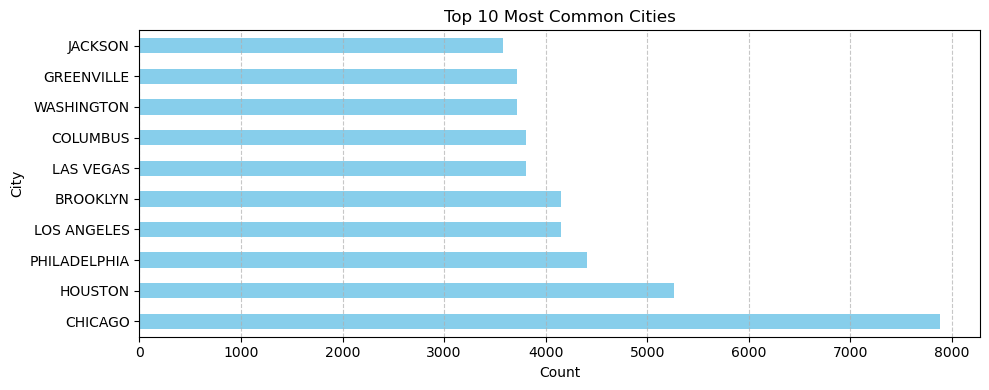

In [28]:
# Visualization - Top Cities
plt.figure(figsize=(10, 4))
top_cities.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

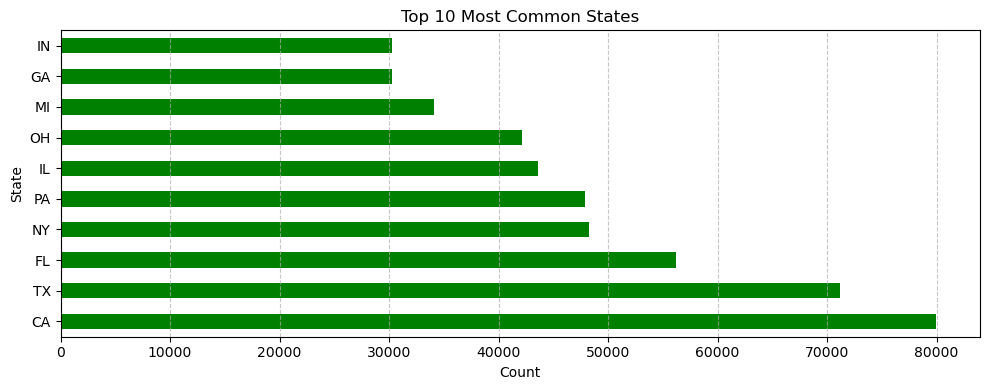

In [29]:
# Visualization - Top States
plt.figure(figsize=(10, 4))
top_states.plot(kind='barh', color='green')
plt.title('Top 10 Most Common States')
plt.xlabel('Count')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
# Summary
print("Top 10 Most Common Facility Names:\n", top_facility_names)
print("*"*50)
print()
print("\nTop 10 Most Common Cities:\n", top_cities)
print("*"*50)
print()
print("\nTop 10 Most Common States:\n", top_states)

Top 10 Most Common Facility Names:
 Facility Name
MEMORIAL HOSPITAL           3076
ST JOSEPH HOSPITAL          2224
GOOD SAMARITAN HOSPITAL     1890
ST JOSEPH MEDICAL CENTER    1890
MEMORIAL MEDICAL CENTER     1494
MERCY MEDICAL CENTER        1384
ST MARY MEDICAL CENTER      1384
ST MARY'S MEDICAL CENTER    1346
ST FRANCIS HOSPITAL         1253
MERCY HOSPITAL              1198
Name: count, dtype: int64
**************************************************


Top 10 Most Common Cities:
 City
CHICAGO         7882
HOUSTON         5262
PHILADELPHIA    4405
LOS ANGELES     4152
BROOKLYN        4152
LAS VEGAS       3806
COLUMBUS        3806
WASHINGTON      3713
GREENVILLE      3713
JACKSON         3577
Name: count, dtype: int64
**************************************************


Top 10 Most Common States:
 State
CA    79970
TX    71168
FL    56196
NY    48234
PA    47923
IL    43571
OH    42100
MI    34083
GA    30282
IN    30243
Name: count, dtype: int64


Facility Names:
- Memorial Hospital appears as the most frequent facility name with 3076 occurrences.
St Joseph Hospital and Good Samaritan Hospital follow with 2224 and 1890 occurrences, respectively.
Several hospitals with similar names like St Joseph Medical Center, Memorial Medical Center, Mercy Medical Center, and St Mary Medical Center exhibit notable occurrences ranging from 1384 to 1890.
Other hospitals such as St Mary's Medical Center, St Francis Hospital, and Mercy Hospital complete the top 10 list with occurrences ranging between 1198 to 1346.

Cities:
- Chicago stands out significantly with 7882 occurrences, leading the list.
Houston, Philadelphia, Los Angeles, and Brooklyn display a similar number of occurrences around 4152 to 5262.
Las Vegas, Columbus, Washington, Greenville, and Jackson also appear in the top 10 list, each with 3577 to 3806 occurrences.

States:
- California (CA) tops the list with a substantial count of 79970.
Texas (TX) follows closely with 71168 occurrences.
Florida (FL), New York (NY), and Pennsylvania (PA) exhibit significant numbers, ranging from 47923 to 56196.
Illinois (IL), Ohio (OH), Michigan (MI), Georgia (GA), and Indiana (IN) complete the top 10 list with occurrences between 30243 to 43571.

### Question 2: How many completed surveys are available for each facility?

Facility Name
MEMORIAL HOSPITAL           42
ST JOSEPH HOSPITAL          32
GOOD SAMARITAN HOSPITAL     28
ST JOSEPH MEDICAL CENTER    28
MEMORIAL MEDICAL CENTER     21
MERCY MEDICAL CENTER        20
ST MARY MEDICAL CENTER      20
ST MARY'S MEDICAL CENTER    20
ST FRANCIS HOSPITAL         19
MERCY HOSPITAL              18
Name: Number of Completed Surveys, dtype: int64


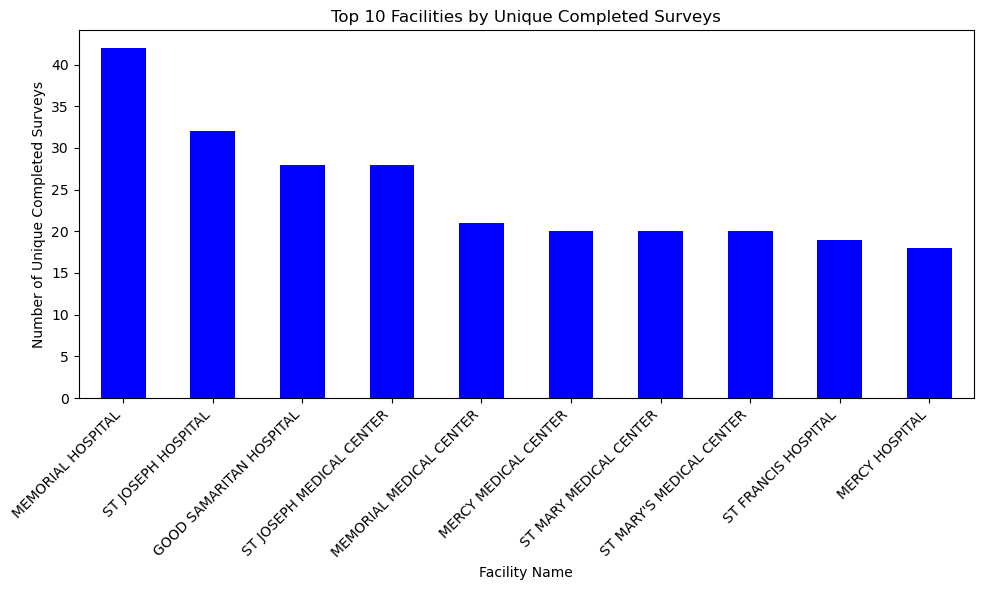

In [33]:
# Convert 'Number of Completed Surveys' column to numeric
hospital_df['Number of Completed Surveys'] = pd.to_numeric(hospital_df['Number of Completed Surveys'], errors='coerce')

# Grouping by Facility Name and aggregating unique completed surveys
unique_completed_surveys_per_facility = hospital_df.groupby('Facility Name')['Number of Completed Surveys'].nunique().sort_values(ascending=False)

# Displaying summary
print(unique_completed_surveys_per_facility.head(10))  # Display top 10 facilities with most unique completed surveys

# Visualization - Bar chart
plt.figure(figsize=(10, 6))
unique_completed_surveys_per_facility.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Facilities by Unique Completed Surveys')
plt.xlabel('Facility Name')
plt.ylabel('Number of Unique Completed Surveys')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The top 10 facilities with the highest number of completed surveys are listed, revealing that Memorial Hospital holds the highest count with 42 completed surveys, followed closely by St Joseph Hospital with 32. Good Samaritan Hospital and St Joseph Medical Center share 28 completed surveys each, while several other facilities, including Memorial Medical Center, Mercy Medical Center, St Mary Medical Center, and St Mary's Medical Center, range between 20 to 21 completed surveys. 

## 4.2 Patient Experience Ratings

### Question 1: What is the overall distribution of patient experience ratings?

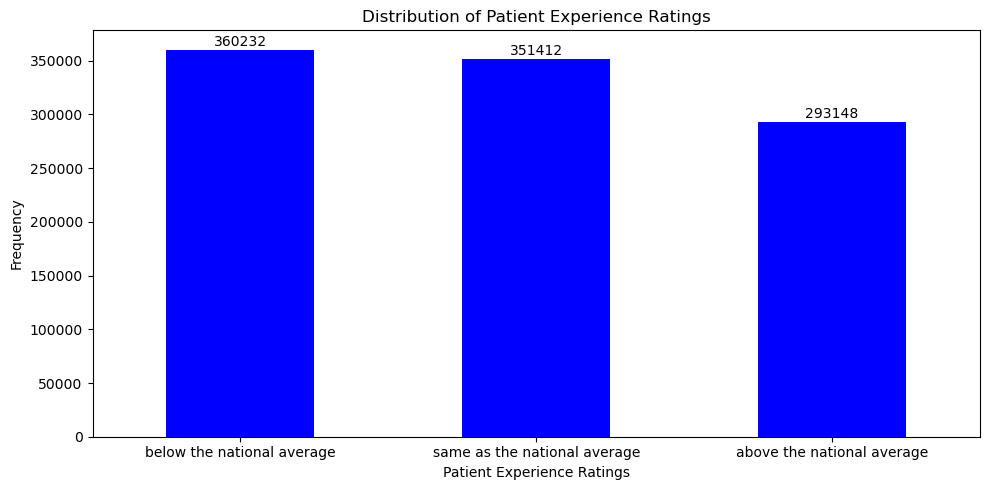

In [34]:
# Lowercase the values in the column 'Patient experience national comparison'
hospital_df['Patient experience national comparison'] = hospital_df['Patient experience national comparison'].str.lower()

# Plotting the distribution of patient experience ratings
plt.figure(figsize=(10, 5))
ax = hospital_df['Patient experience national comparison'].value_counts().plot(kind='bar', color='blue')

plt.title('Distribution of Patient Experience Ratings')
plt.xlabel('Patient Experience Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()

# Adding annotations to the bars
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 1000, str(i.get_height()), ha='center', va='bottom')

plt.show()

The distribution of patient experience ratings across different hospitals reveals an intriguing pattern. The majority of hospitals fall within the "Below the National Average," "Same as the National Average," and "Above the National Average" categories, with significant counts in each classification.

### Question 2: How do hospitals fare in terms of patient experience compared to the national average?

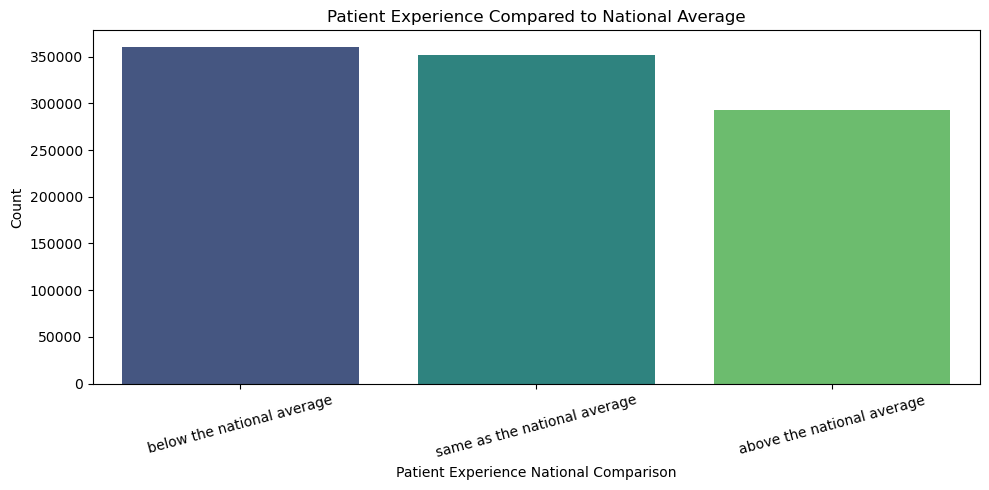

In [35]:
# Count occurrences of each rating compared to the national average
experience_comparison_counts = hospital_df['Patient experience national comparison'].value_counts()

# Plotting the comparison against the national average
plt.figure(figsize=(10, 5))
sns.barplot(x=experience_comparison_counts.index, y=experience_comparison_counts.values, palette='viridis')
plt.title('Patient Experience Compared to National Average')
plt.xlabel('Patient Experience National Comparison')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The visualization presents the distribution of hospital ratings in comparison to the national average for patient experience. It illustrates the frequency of hospitals falling into categories such as "Above the national average," "Same as the national average," or "Below the national average."

### Question 3: Has there been any noticeable change or improvement in patient experience ratings over different years?

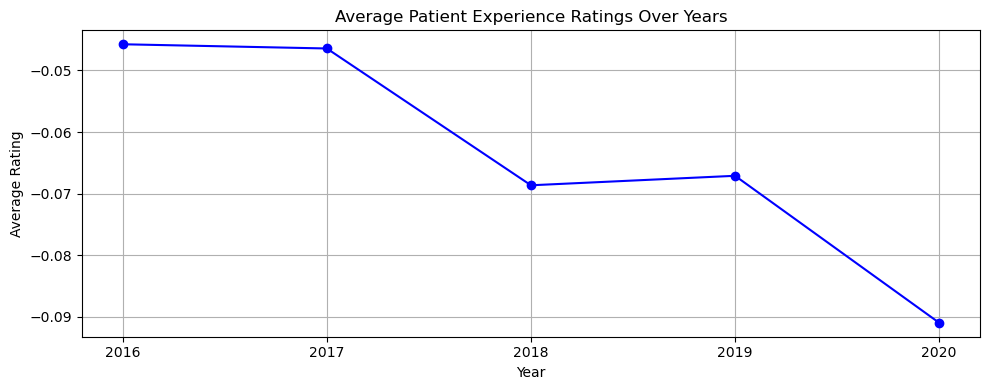

In [36]:
# Define a function to map categorical ratings to numeric values
def map_ratings(value):
    if 'above the national average' in value:
        return 1
    elif 'same as the national average' in value:
        return 0
    elif 'below the national average' in value:
        return -1
    else:
        return None  # Handle other cases or missing values as needed

# Apply the mapping function to create a new numeric column for ratings
hospital_df['Patient experience numeric'] = hospital_df['Patient experience national comparison'].apply(map_ratings)

# Filter out rows where the mapping function returned None (handles other cases or missing values)
filtered_hospital_df = hospital_df[hospital_df['Patient experience numeric'].notnull()]

# Group by year and calculate mean patient experience ratings
mean_ratings_per_year = filtered_hospital_df.groupby('Year')['Patient experience numeric'].mean()

# Plotting the trends of patient experience ratings over years
plt.figure(figsize=(10, 4))
mean_ratings_per_year.plot(marker='o', color='blue')
plt.title('Average Patient Experience Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(mean_ratings_per_year.index)
plt.tight_layout()
plt.show()

The analysis of average patient experience ratings across different years reveals trends in how hospitals performed in comparison to the national benchmark. From the examination of the data, it seems that there might be some fluctuations in hospital performance in terms of patient experience over the years. The visual representation of average ratings indicates changes in patient experience, showcasing variations in how hospitals fared against the national benchmark across different years.

### Question 4: Are there any trends or patterns in patient experience ratings over time?

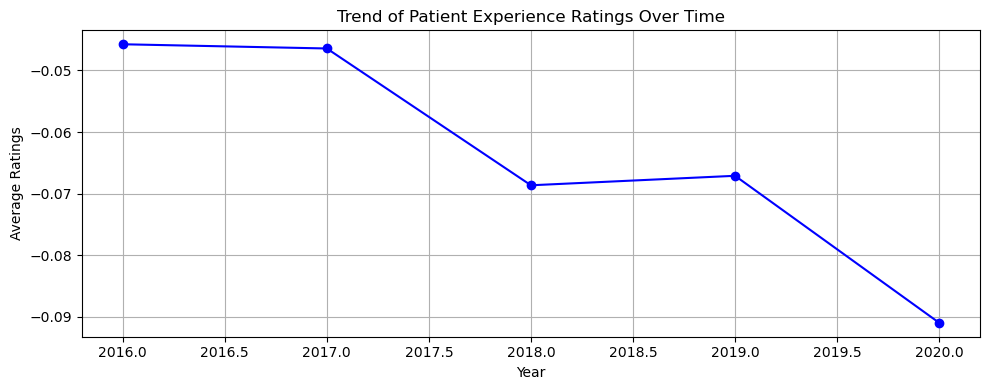

In [37]:
# Group by year and calculate average patient experience ratings
average_ratings_per_year = hospital_df.groupby('Year')['Patient experience numeric'].mean()

# Plotting the trend of patient experience ratings over time
plt.figure(figsize=(10, 4))
average_ratings_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Trend of Patient Experience Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()

This visualization depicts the average patient experience ratings across different years, allowing for an assessment of any noticeable trends or changes in ratings over time. 

### Question 5: Which facilities have the highest patient survey ratings?

In [38]:
# Filter the rows with numeric patient survey ratings
ratings = hospital_df['Patient Survey Star Rating'].str.isnumeric()

# Convert the filtered values to numeric (integer)
hospital_df['Patient Survey Star Rating'] = hospital_df['Patient Survey Star Rating'][ratings].astype(int)

# Group by facility name and calculate the mean patient survey star rating
facility_ratings = hospital_df.groupby('Facility Name')['Patient Survey Star Rating'].mean()

# Sort the facilities by the mean rating in descending order to get the highest ratings first
highest_rated_facilities = facility_ratings.sort_values(ascending=False)

# Display the top facilities with the highest ratings
top_facilities = highest_rated_facilities.head(10)
print(top_facilities)

Facility Name
T J HEALTH COLUMBIA                      5.000000
OKLAHOMA HEART HOSPITAL, LLC             4.947368
SAUK PRAIRIE HOSPITAL                    4.934783
CROSSING RIVERS HEALTH MEDICAL CENTER    4.869565
DOOR COUNTY MEDICAL CENTER               4.863636
OKLAHOMA HEART HOSPITAL SOUTH, LLC       4.859649
COMMUNITY MEDICAL CENTER, INC            4.857143
MARINERS HOSPITAL                        4.847826
HEART HOSPITAL OF LAFAYETTE              4.842105
BRODSTONE MEMORIAL HOSP                  4.818182
Name: Patient Survey Star Rating, dtype: float64


## 4.3 Geographic Distribution

### Question 1: What is the geographic distribution of facilities by states?

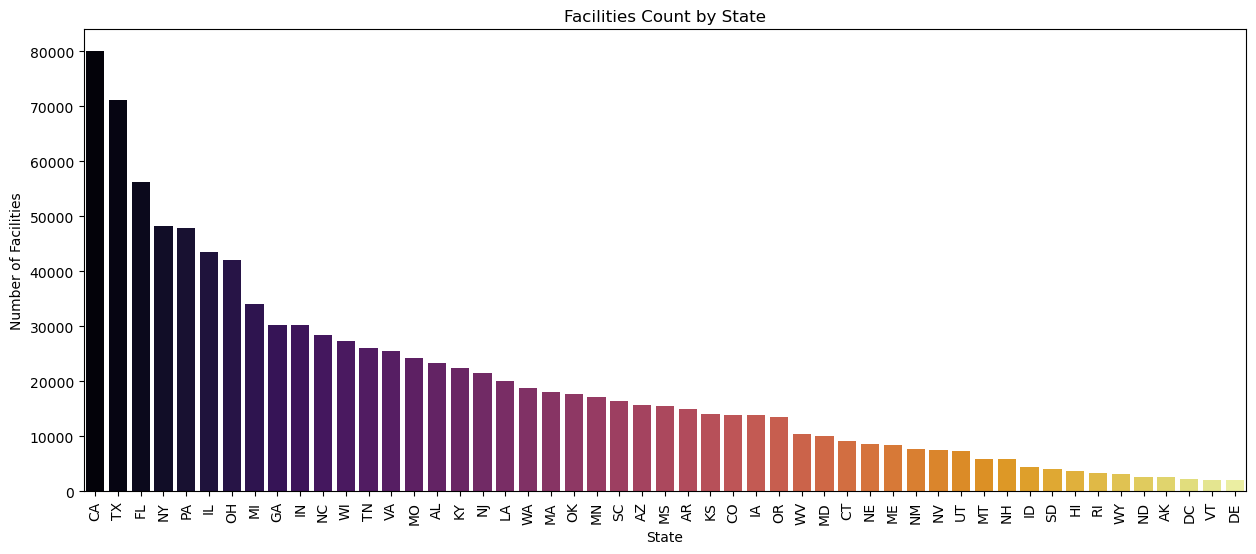

In [39]:
# Plotting the count of facilities by State
plt.figure(figsize=(15, 6))
sns.countplot(data=hospital_df, x='State', order=hospital_df['State'].value_counts().index, palette='inferno')
plt.title('Facilities Count by State')
plt.xlabel('State')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=90)
plt.show()

The distribution of healthcare facilities across different states shows significant disparities in the dataset. California (CA) has the highest count of facilities with approximately 79,970, followed closely by Texas (TX) with 71,168 facilities and Florida (FL) with 56,196 facilities. Conversely, the District of Columbia (DC) and Vermont (VT) have the lowest count, each having only 2,329 and 2,076 facilities, respectively. 

## Question 2: What is the geographic distribution of facilities by cities?

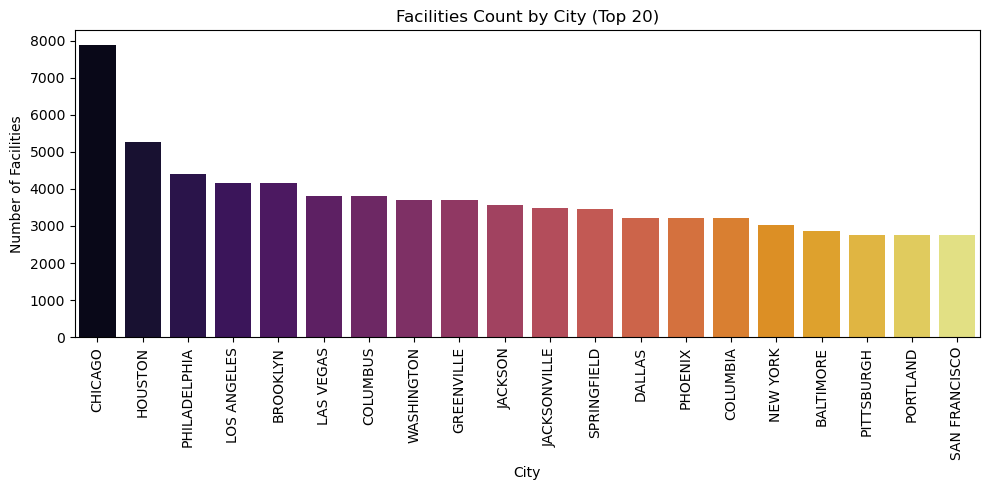

In [40]:
# Get the top 20 cities by facility count
top_cities = hospital_df['City'].value_counts().nlargest(20)

# Create a horizontal bar plot for the top cities
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='inferno')
plt.title('Facilities Count by City (Top 20)')
plt.xlabel('City')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Question 3: What is the geographic distribution of facilities by counties?

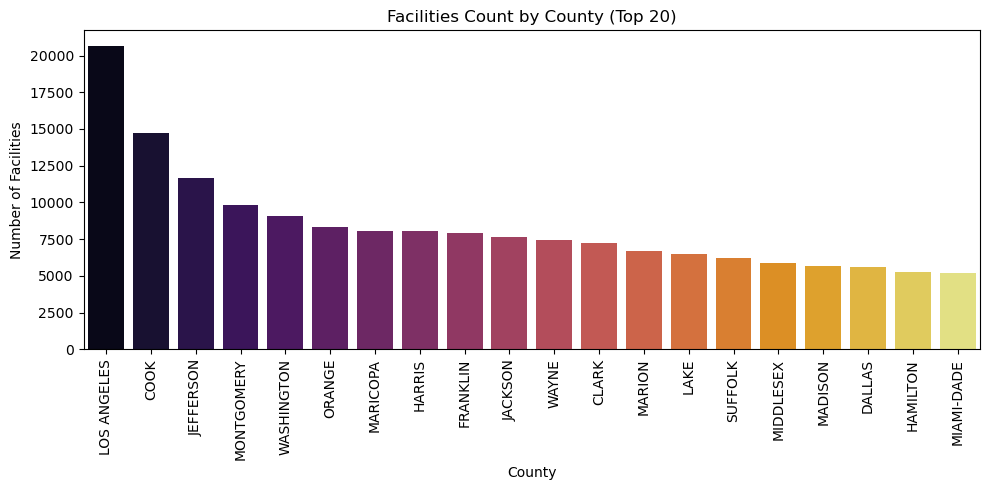

In [42]:
# Get the top 20 Counties by facility count
top_county = hospital_df['County Name'].value_counts().nlargest(20)

# Create a horizontal bar plot for the top cities
plt.figure(figsize=(10, 5))
sns.barplot(x=top_county.index, y=top_county.values, palette='inferno')
plt.title('Facilities Count by County (Top 20)')
plt.xlabel('County')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## 4.4 Hospital Information

### Question 1: What is the distribution of Hospital overall ratings?

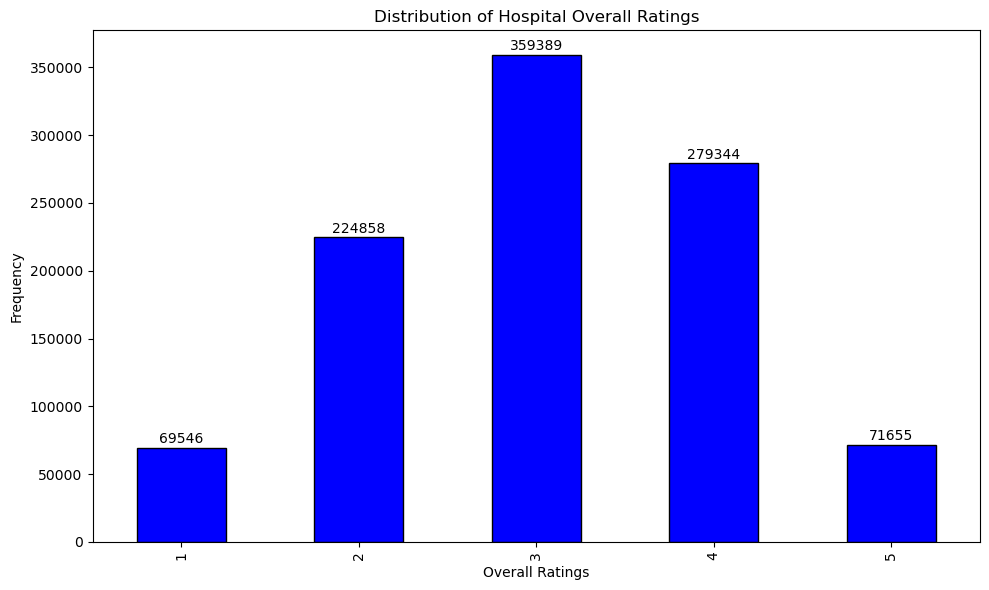

In [44]:
# Plotting the distribution of Hospital overall ratings
plt.figure(figsize=(10, 6))
hospital_df['Hospital overall rating'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Overall Ratings')
plt.ylabel('Frequency')

# Adding annotations
for i, value in enumerate(hospital_df['Hospital overall rating'].value_counts().sort_index()):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

### Question 2: What are the different types of hospitals present?

['Acute Care Hospitals' 'Critical Access Hospitals']


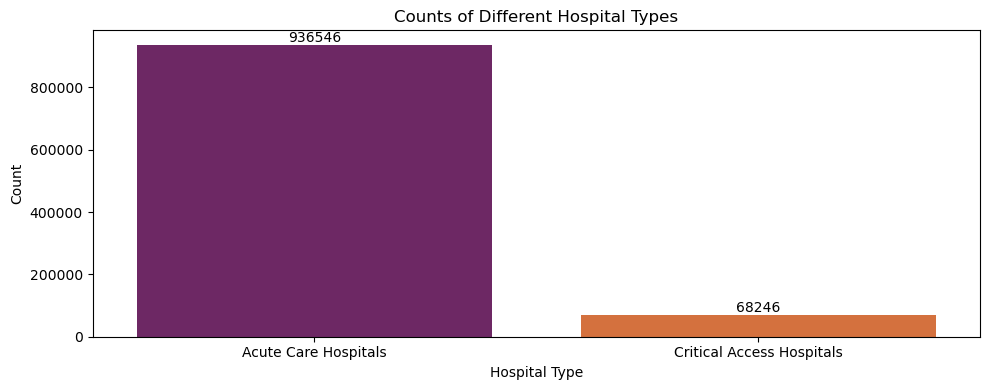

In [45]:
# Get unique hospital types present in the dataset
hospital_types = hospital_df['Hospital Type'].unique()

# Display the unique hospital types
print(hospital_types)

# Count occurrences of each hospital type
hospital_type_counts = hospital_df['Hospital Type'].value_counts()

# Plotting the count of each hospital type
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=hospital_type_counts.index, y=hospital_type_counts.values, palette='inferno')
plt.title('Counts of Different Hospital Types')
plt.xlabel('Hospital Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Adding figure labels on top of the bars
for i, count in enumerate(hospital_type_counts.values):
    ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

The dataset comprises two main types of hospitals: Acute Care Hospitals and Critical Access Hospitals. Acute Care Hospitals make up the majority, accounting for a significantly higher count of 936,546, while Critical Access Hospitals are notably fewer in number, constituting 68,246 instances in the dataset.

### Question 3: What is the distribution of hospital ownership types?

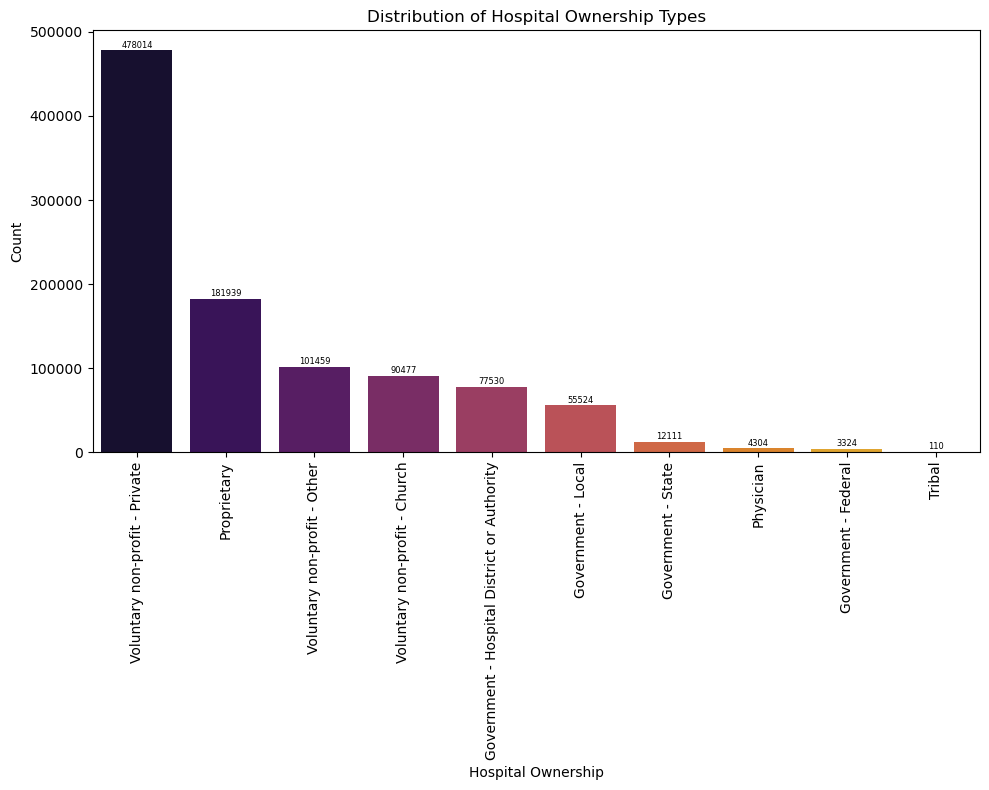

In [46]:
# Count occurrences of each hospital ownership type
ownership_counts = hospital_df['Hospital Ownership'].value_counts()

# Plotting the count of each hospital ownership type
plt.figure(figsize=(10, 8))
sns.barplot(x=ownership_counts.index, y=ownership_counts.values, palette='inferno')
plt.title('Distribution of Hospital Ownership Types')
plt.xlabel('Hospital Ownership')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Adding figure labels on top of the bars
for i, count in enumerate(ownership_counts.values):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=6)

plt.show()

The distribution of hospital ownership types in the dataset indicates that "Voluntary non-profit - Private" hospitals represent the largest proportion, comprising approximately 478,014 instances. "Proprietary" ownership follows as the next significant category, accounting for around 181,939 hospitals. Other notable categories include "Voluntary non-profit - Other" with approximately 101,459 instances, "Voluntary non-profit - Church" at about 90,477 hospitals, and "Government - Hospital District or Authority" representing roughly 77,530 hospitals. The dataset includes fewer instances of hospitals falling under categories such as "Government - Local," "Government - State," "Physician," "Government - Federal," and "Tribal."

## 4.5 Rating Comparisons

### Question 1: What are the different rating comparisons available for each category?
- Categories: Hospital Overall Rating, Mortality National Comparison, Safety of Care National Comparison, Readmission National Comparison, Patient Experience National Comparison, Effectiveness of Care National Comparison, Timeliness of Care National Comparison, Efficient Use of Medical Imaging National Comparison

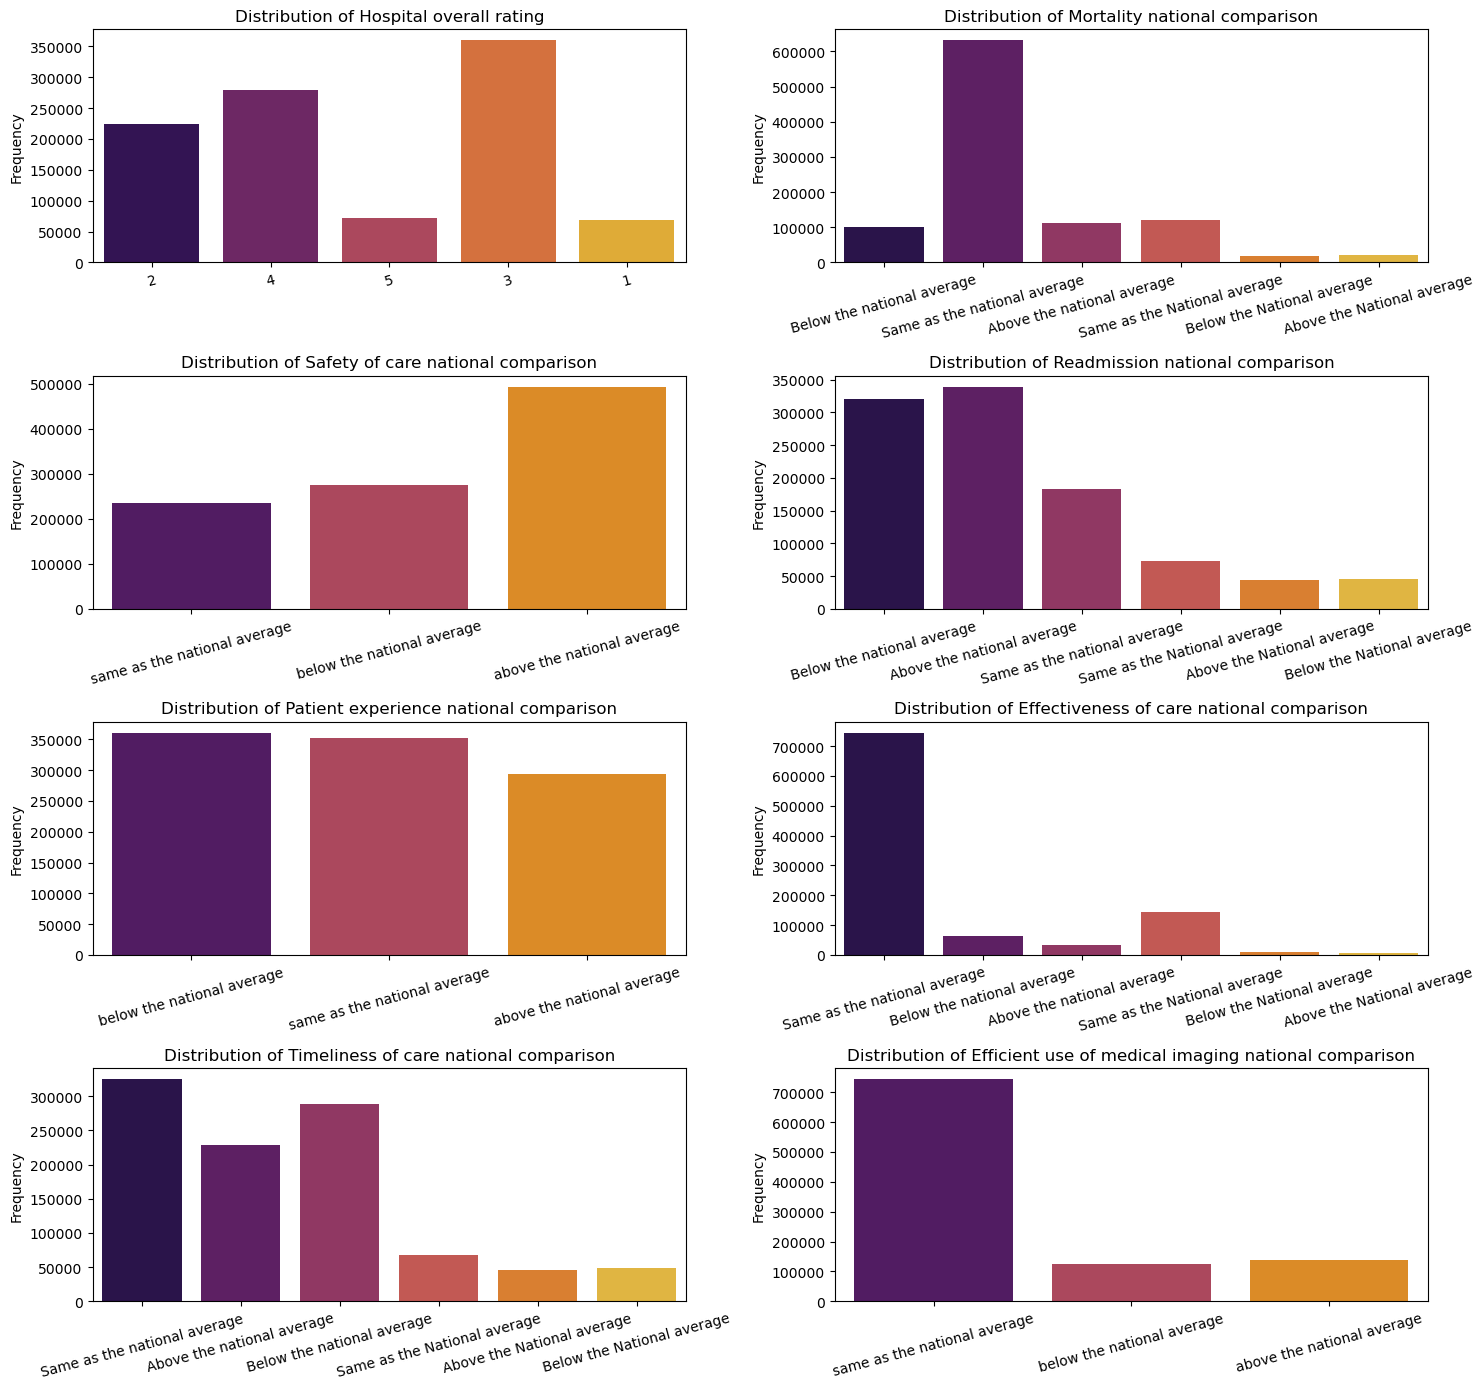

In [47]:
columns_to_visualize = ['Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison']

plt.figure(figsize=(15, 14))

for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=hospital_df, x=col, palette='inferno')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

## 4.6 Time Analysis

### Question 1: What is the range of start and end dates?

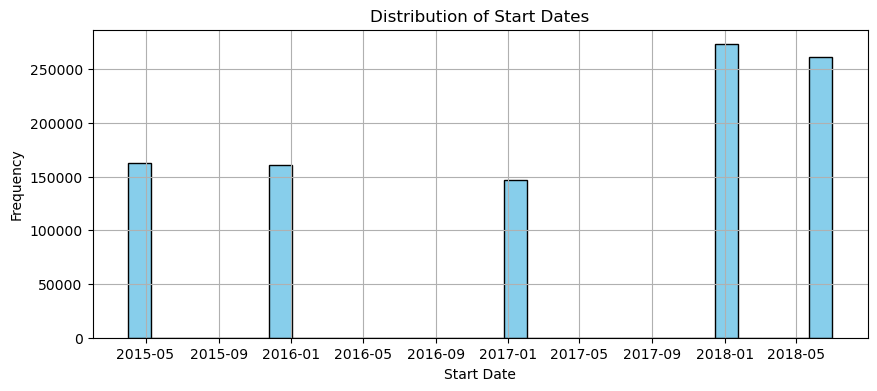

In [48]:
start_dates = pd.to_datetime(hospital_df['Start Date'])
end_dates = pd.to_datetime(hospital_df['End Date'])

# Visualizing distribution of start dates
plt.figure(figsize=(10, 4))
plt.hist(start_dates, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Start Dates')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

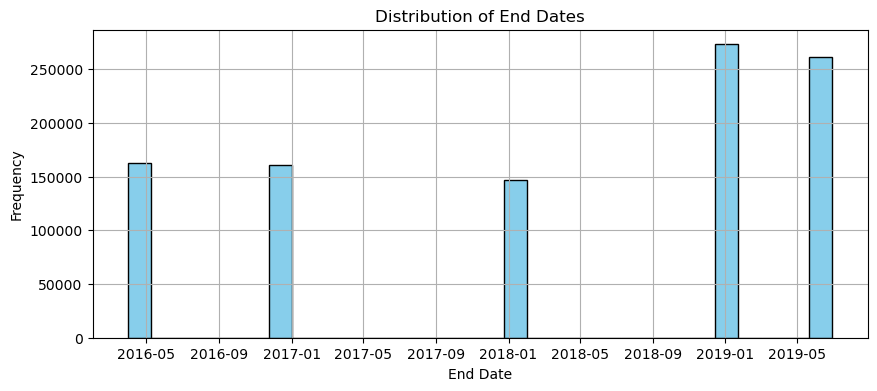

In [49]:
# Visualizing distribution of end dates
plt.figure(figsize=(10, 4))
plt.hist(end_dates, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of End Dates')
plt.xlabel('End Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [50]:
# Calculating the range of start and end dates
start_date_range = start_dates.min(), start_dates.max()
end_date_range = end_dates.min(), end_dates.max()

print(f"Range of Start Dates: {start_date_range}")
print(f"Range of End Dates: {end_date_range}")

Range of Start Dates: (Timestamp('2015-04-01 00:00:00'), Timestamp('2018-07-01 00:00:00'))
Range of End Dates: (Timestamp('2016-03-31 00:00:00'), Timestamp('2019-06-30 00:00:00'))


The dataset encompasses a range of surveys conducted within a substantial time frame. The surveys commenced between April 1, 2015, and July 1, 2018, as denoted by the start dates, while concluding between March 31, 2016, and June 30, 2019, as indicated by the end dates. This duration suggests that the surveys were conducted over a period of more than three years, allowing for a comprehensive examination of trends and patterns in the data across a diverse timeline.

### Question 2: How many unique years are covered in the dataset and survey count in each year? 

In [51]:
unique_years = hospital_df['Year'].unique()

# Counting the number of unique years
num_unique_years = len(unique_years)

# Displaying the unique years and the count
print(f"Unique Years: {unique_years}")
print(f"Number of Unique Years: {num_unique_years}")

Unique Years: [2020 2019 2018 2017 2016]
Number of Unique Years: 5


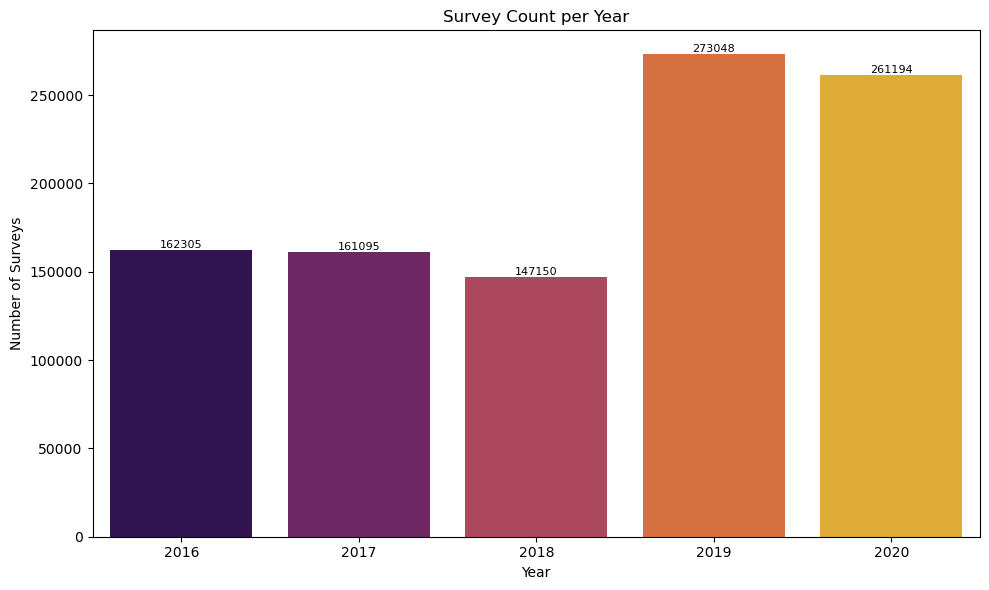

In [53]:
# Count the frequency of surveys for each unique year
survey_count_per_year = hospital_df['Year'].value_counts().sort_index()

# Plotting the count of surveys per unique year
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=survey_count_per_year.index, y=survey_count_per_year.values, palette='inferno')
plt.title('Survey Count per Year')
plt.xlabel('Year')
plt.ylabel('Number of Surveys')

# Adding figure labels on top of the bars
for i, count in enumerate(survey_count_per_year.values):
    ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

The year 2019 amassed the highest number of surveys, totaling 273,048, closely followed by 2020 with 261,194 surveys. The years 2016 and 2017 recorded relatively similar counts, each comprising approximately 162,305 and 161,095 surveys, respectively, while 2018 accounted for 147,150 surveys. The distribution illustrates a gradual increase in survey participation from 2016 onwards, reaching its peak in 2019 before a relatively consistent count in the subsequent years, with a slight decline in 2020.

## 4.7 Top & Lowest Facilities

### Question 1: Which facility has best performance overall? Top 10 Facilities.

In [55]:
# Find the hospitals with the highest overall rating
top_hospitals_overall = hospital_df[hospital_df['Hospital overall rating'] == '5']

# Get unique hospitals with the best overall performance
unique_top_hospitals_overall = top_hospitals_overall['Facility Name'].unique()

# Display the total number of hospitals with the best overall performance
print(f"Total Number of Hospitals with Best Overall Performance: {len(unique_top_hospitals_overall)}")

print("*"*60)
print("  ")

# Show the names of unique top hospitals with the best overall performance
print("Hospitals with the Best Overall Performance:(First 20)")
display(unique_top_hospitals_overall[:20])

Total Number of Hospitals with Best Overall Performance: 543
************************************************************
  
Hospitals with the Best Overall Performance:(First 20)


array(['FAYETTE MEDICAL CENTER', 'SOUTH BALDWIN REGIONAL MEDICAL CENTER',
       'PRATTVILLE BAPTIST HOSPITAL', 'LAKELAND COMMUNITY HOSPITAL',
       'BAPTIST MEDICAL CENTER EAST', 'FLAGSTAFF MEDICAL CENTER',
       'BANNER BOSWELL MEDICAL CENTER', 'MAYO CLINIC HOSPITAL',
       'MERCY HOSPITAL NORTHWEST ARKANSAS',
       'BAPTIST HEALTH MEDICAL CENTER-STUTTGART',
       'ARKANSAS HEART HOSPITAL, LLC', 'PENINSULA MEDICAL CENTER',
       'ALTA BATES SUMMIT MEDICAL CENTER', 'SHARP MEMORIAL HOSPITAL',
       'SANTA MONICA - UCLA MED CTR & ORTHOPAEDIC HOSPITAL',
       'COMMUNITY HOSPITAL OF THE MONTEREY PENINSULA',
       'ST JUDE MEDICAL CENTER',
       'JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS',
       'SEQUOIA HOSPITAL', 'SHARP CHULA VISTA MEDICAL CENTER'],
      dtype=object)

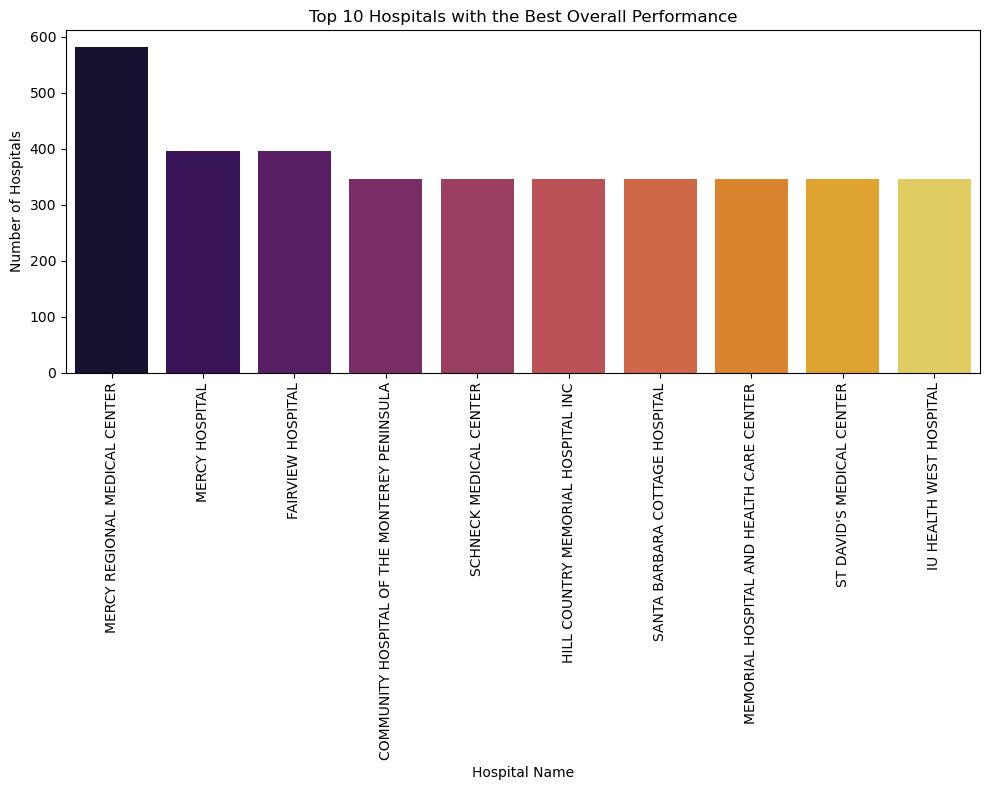

In [56]:
# Get the top 10 hospitals with the best overall performance
top_10_hospitals_overall = top_hospitals_overall['Facility Name'].value_counts().nlargest(10)

# Create a horizontal bar plot for the top 10 hospitals with the best overall performance
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_hospitals_overall.index, y=top_10_hospitals_overall.values, palette="inferno")
plt.title("Top 10 Hospitals with the Best Overall Performance")
plt.xlabel("Hospital Name")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 2: Which facility has lowest performance overall?

In [57]:
# Sort the facilities by the mean rating in ascending order to get the lowest ratings first
lowest_rated_facilities = facility_ratings.sort_values(ascending=True)

# Display the facilities with the lowest ratings
bottom_facilities = lowest_rated_facilities.head(10)
print(bottom_facilities)

Facility Name
LOS ANGELES COMMUNITY HOSPITAL                      1.000000
ADVENTIST HEALTHCARE FORT WASHINGTON MEDICAL CTR    1.000000
UMD PRINCE GEORGE'S HOSPITAL CTR                    1.000000
UNIVERSITY OF MD PRINCE GEORGE'S HOSPITAL CTR       1.000000
SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD           1.000000
JACKSON PARK HOSPITAL                               1.017544
MEMORIAL HOSPITAL OF GARDENA                        1.017544
VICTOR VALLEY GLOBAL MEDICAL CENTER                 1.035088
GARDENS REGIONAL HOSPITAL AND MEDICAL CENTER        1.041667
UNIVERSITY OF MD LAUREL REGIONAL HOSPITAL           1.045455
Name: Patient Survey Star Rating, dtype: float64


# 5. Feature Engineering

## 5.1 Selecting Columns

In [58]:
hospital_df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Patient experience numeric
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",NaN,77,Not Applicable,535.0,22,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,same as the national average,Below the national average,below the national average,Same as the national average,Same as the national average,same as the national average,-1
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",NaN,7,Not Applicable,535.0,22,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,same as the national average,Below the national average,below the national average,Same as the national average,Same as the national average,same as the national average,-1
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",NaN,16,Not Applicable,535.0,22,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,same as the national average,Below the national average,below the national average,Same as the national average,Same as the national average,same as the national average,-1
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,NaN,5,90,535.0,22,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,same as the national average,Below the national average,below the national average,Same as the national average,Same as the national average,same as the national average,-1
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,3.0,5,Not Applicable,535.0,22,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,same as the national average,Below the national average,below the national average,Same as the national average,Same as the national average,same as the national average,-1


In [59]:
hospital_df.isna().sum()

Facility ID                                                  0
Facility Name                                                0
Address                                                      0
City                                                         0
State                                                        0
ZIP Code                                                     0
County Name                                                  0
Phone Number                                                 0
HCAHPS Measure ID                                            0
HCAHPS Question                                              0
HCAHPS Answer Description                                    0
Patient Survey Star Rating                              840100
HCAHPS Answer Percent                                        0
HCAHPS Linear Mean Value                                     0
Number of Completed Surveys                                 55
Survey Response Rate Percent                           

Patient Survey Star Rating is having more than 80% missing values so we're dropping it

In [60]:
hospital_df = hospital_df.drop(columns = 'Patient Survey Star Rating', axis = 1)

Removing the missing values from 'Number of Completed Surveys' Column 

In [61]:
hospital_df.dropna(subset=['Number of Completed Surveys'], inplace=True)

Selecting the columns which will be used in the development of ML model

In [63]:
hospital_df = hospital_df.drop(columns = ['Facility ID', 'Facility Name', 'Address','State', 'City', 'ZIP Code',
            'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Answer Percent', 'HCAHPS Linear Mean Value', 
            'Start Date', 'End Date', 'Number of Completed Surveys', 'Survey Response Rate Percent'])

Making Categories more subtle

In [64]:
value_dict = {'Voluntary non-profit - Church': 'Voluntary non-profit', 'Voluntary non-profit - Private': 'Voluntary non-profit', 'Voluntary non-profit - Other': 'Voluntary non-profit',
    'Government - Hospital District or Authority': 'Government', 'Government - Local': 'Government', 'Government - State': 'Government', 'Government - Federal': 'Government'}
# Replace values in column
hospital_df['Hospital Ownership'] = hospital_df['Hospital Ownership'].replace(value_dict)

## 5.2 Encoding the Categorical Values

In [65]:
en_hosp_df = hospital_df.copy()

### 5.2.1 Separating Features X and Target Variable Y

In [66]:
# Separate features (X) and target variable (y)
X = en_hosp_df.drop(columns = ['Patient experience national comparison', 'Patient experience numeric'])
y = en_hosp_df['Patient experience national comparison']

### 5.2.2 Categorizing columns based on data

In [67]:
# Categorizing columns based on data type
categorical_cols = ['HCAHPS Question', 'HCAHPS Answer Description', 'Hospital Type', 'Hospital Ownership',
                    'Emergency Services',
                    'Mortality national comparison', 'Safety of care national comparison',
                    'Readmission national comparison', 'Effectiveness of care national comparison',
                    'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']

# Numeric columns excluding Year and Hospital overall rating
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Year', 'Hospital overall rating']]

## 5.3 ML Classifiers Implementation

### 5.3.1 Spliting the data and applying transformation

In [68]:
# Custom Encoder for Label Encoding
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns  # list of columns to encode

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', MultiColumnLabelEncoder(columns=categorical_cols), categorical_cols)
    ], remainder='passthrough')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformation to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Shape of X_train_preprocessed: ", X_train_preprocessed.shape)
print("Shape of X_test_preprocessed: ", X_test_preprocessed.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

X_train = X_train_preprocessed
X_test = X_test_preprocessed

Shape of X_train_preprocessed:  (803789, 13)
Shape of X_test_preprocessed:  (200948, 13)
Shape of y_train:  (803789,)
Shape of y_test:  (200948,)


### 5.3.2 Classifier Implementation

+ ==================================================================================================== +
			1-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.673711606982901
--------------------------------------------------
F1 :  [0.6841544  0.7512445  0.58018029]
--------------------------------------------------
Reacll :  [0.71323026 0.75752247 0.55467627]
--------------------------------------------------
Precision :  [0.65735633 0.74506973 0.60814269]
--------------------------------------------------
Confusion Matrix....
 [[41704  4021 12747]
 [ 5147 54706 12364]
 [16591 14697 38971]]
--------------------------------------------------
Classification Report....
                               precision    recall  f1-score   support

  above the national average       0.66      0.71      0.68     58472
  below the national average       0.75      0.76      0.75     72

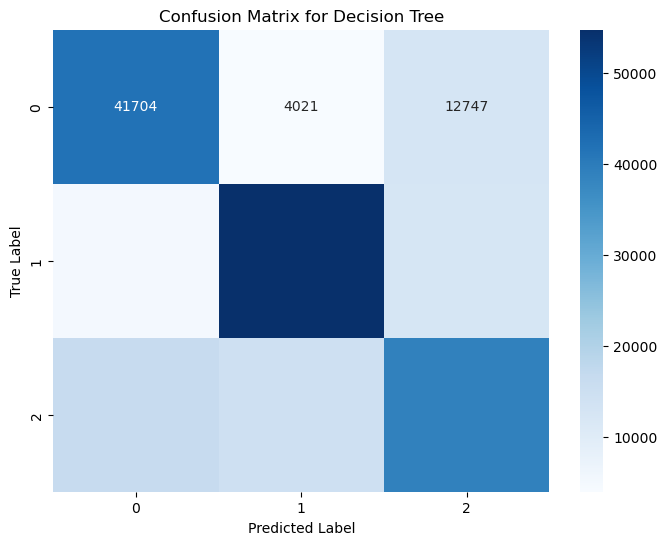

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 58.303 seconds...
							-----------------------------------------------------------



In [ ]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# check the performance on diffrent regressor
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('LogisitcRegression', LogisticRegression()))

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    # Plotting the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})

### 5.3.3 Results Visualizations

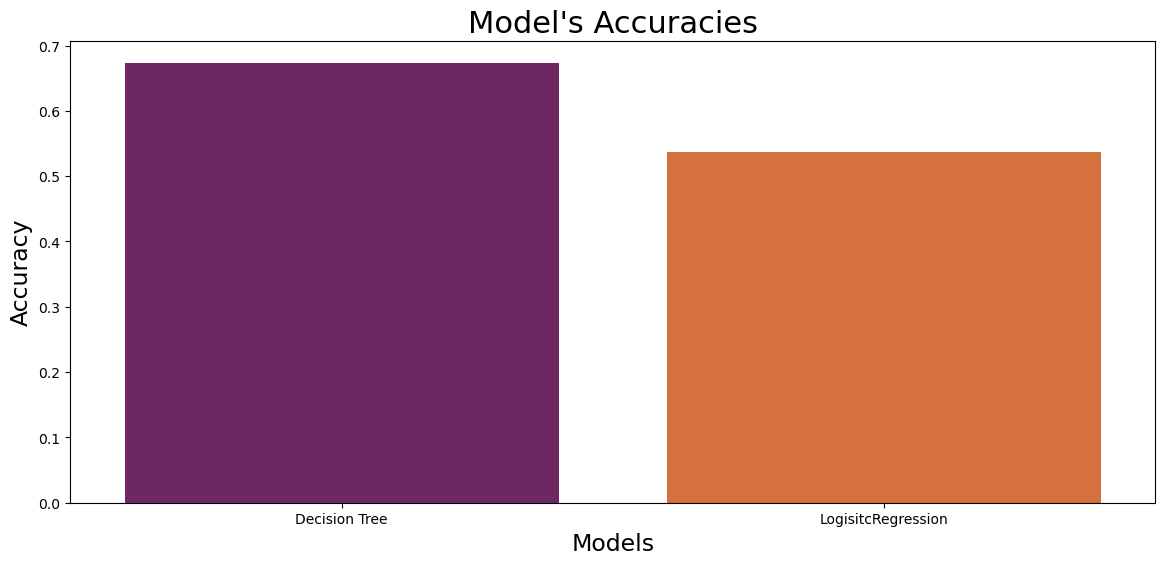

In [61]:
plt.figure(figsize=(14, 6))
sns.barplot(x=list(dict(models).keys()), y=acc, palette="inferno")
plt.title("Model's Accuracies", fontsize=22)
plt.xlabel("Models", fontsize=17)
plt.ylabel("Accuracy", fontsize=17)
plt.show()